,Name,Value,MatchScore_Zeta,MatchScore_Delta
0,pi,3.141593,3,3
1,sqrt(pi),1.772454,3,3
2,pi/2,1.570796,2,2
3,pi/3,1.047198,4,2
4,pi/4,0.785398,3,3
5,pi-3,0.141593,3,3
6,pi/sqrt(3),1.813799,3,2
7,phi,1.618034,2,2
8,phi-1,0.618034,2,2
9,phi^2,2.618034,2,2


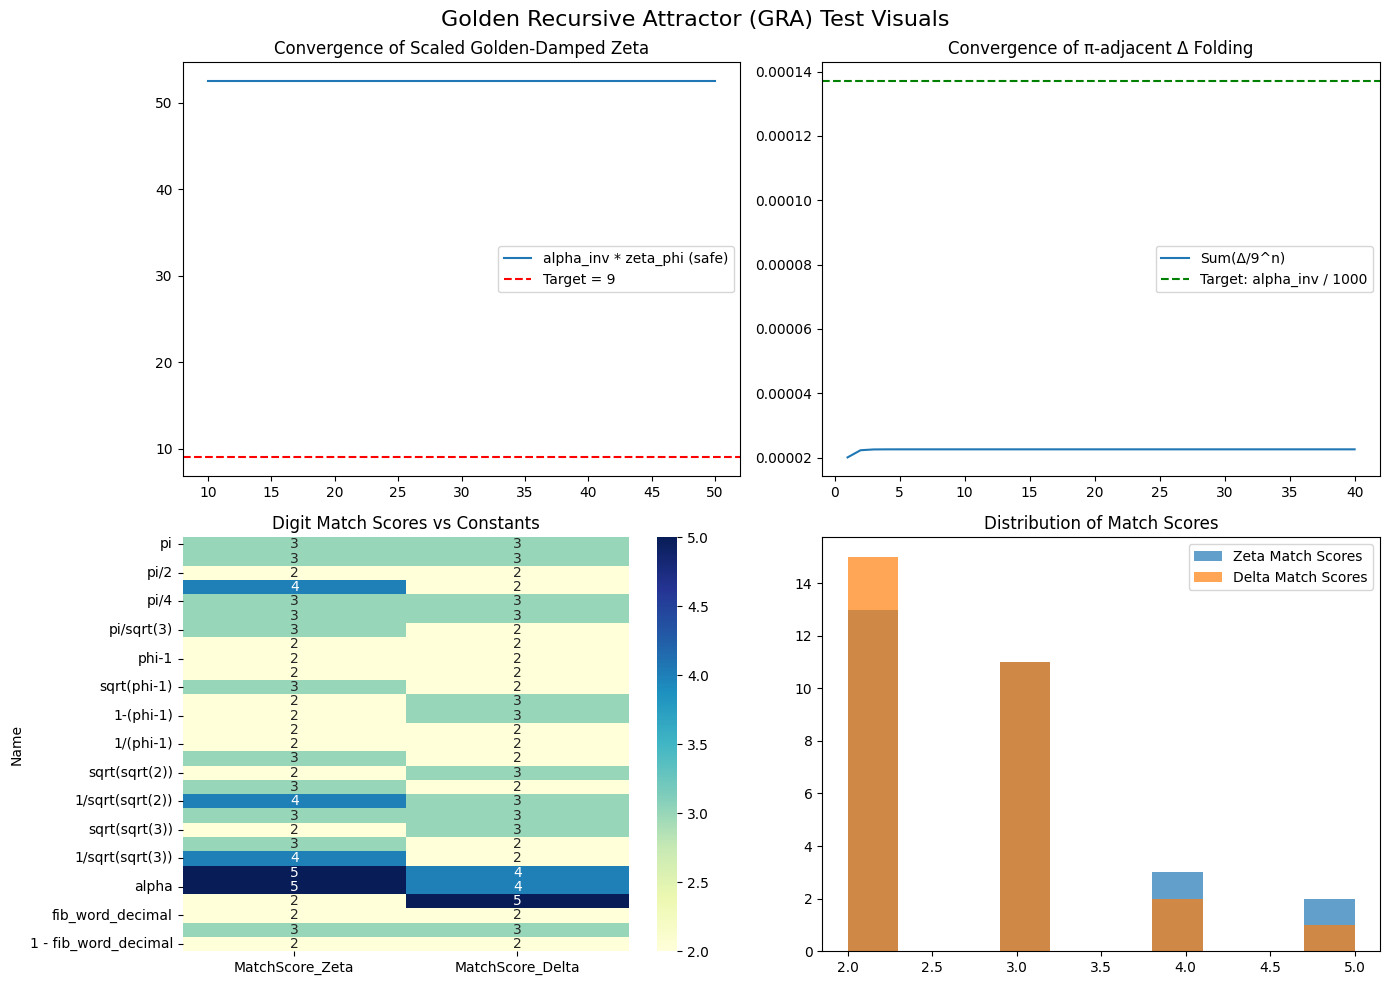

In [19]:
# Finalized and cleaned golden_damped_zeta implementation with robust overflow protection
def golden_damped_zeta_safe(N=50, log_term_cutoff=-700):
    primes = list(primerange(1, 1000))[:N]
    log_phi = math.log(phi_f)
    terms = []

    for i, p in enumerate(primes):
        try:
            if p == 1:
                continue  # skip to avoid undefined log
            exponent = math.exp((i + 1) * log_phi)  # φⁿ
            log_term = -exponent * math.log(p)      # -φⁿ·log(p)
            if log_term < log_term_cutoff:
                terms.append(0)  # effectively zero
            else:
                terms.append(math.exp(log_term))
        except (OverflowError, ValueError):
            terms.append(0)  # fail-safe fallback

    zeta_phi = sum(terms)
    scaled = alpha_inv * zeta_phi
    return zeta_phi, scaled

# Re-run all safely and display results
zeta_val, scaled_zeta = golden_damped_zeta_safe()
delta_vals = delta_fold()

results = []
for name, const in special_constants.items():
    try:
        score_zeta = digit_match_score(scaled_zeta, const)
        score_delta = digit_match_score(delta_vals[-1], const)
    except Exception:
        score_zeta, score_delta = 0, 0
    results.append((name, const, score_zeta, score_delta))

df_results = pd.DataFrame(results, columns=["Name", "Value", "MatchScore_Zeta", "MatchScore_Delta"])

# Plotting (removing all internal ACE-specific tools)
fig, axs = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle("Golden Recursive Attractor (GRA) Test Visuals", fontsize=16)

# Plot 1: Zeta_phi convergence
try:
    zeta_vals = [golden_damped_zeta_safe(n)[1] for n in range(10, 51)]
    axs[0,0].plot(range(10, 51), zeta_vals, label="alpha_inv * zeta_phi (safe)")
    axs[0,0].axhline(9, color='red', linestyle='--', label="Target = 9")
    axs[0,0].set_title("Convergence of Scaled Golden-Damped Zeta")
    axs[0,0].legend()
except Exception as e:
    axs[0,0].text(0.5, 0.5, f"Error: {str(e)}", ha='center')

# Plot 2: Delta folding
axs[0,1].plot(range(1, len(delta_vals)+1), delta_vals, label="Sum(Δ/9^n)")
axs[0,1].axhline(0.000137036, color='green', linestyle='--', label="Target: alpha_inv / 1000")
axs[0,1].set_title("Convergence of π-adjacent Δ Folding")
axs[0,1].legend()

# Plot 3: Heatmap of digit match scores
try:
    sns.heatmap(df_results[["MatchScore_Zeta", "MatchScore_Delta"]].set_index(df_results["Name"]),
                annot=True, fmt="d", cmap="YlGnBu", ax=axs[1,0])
    axs[1,0].set_title("Digit Match Scores vs Constants")
except Exception as e:
    axs[1,0].text(0.5, 0.5, f"Error: {str(e)}", ha='center')

# Plot 4: Histogram of match score distributions
try:
    axs[1,1].hist(df_results["MatchScore_Zeta"], bins=10, alpha=0.7, label="Zeta Match Scores")
    axs[1,1].hist(df_results["MatchScore_Delta"], bins=10, alpha=0.7, label="Delta Match Scores")
    axs[1,1].set_title("Distribution of Match Scores")
    axs[1,1].legend()
except Exception as e:
    axs[1,1].text(0.5, 0.5, f"Error: {str(e)}", ha='center')

from IPython.display import display
plt.tight_layout()
display(df_results)
plt.show()
